In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from tensorflow.keras.models import load_model

In [2]:
df=pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.87974371,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.77046169,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.00445915,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.49109635,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.13017482,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            10007 non-null  float64
 1   P            10007 non-null  float64
 2   K            10007 non-null  float64
 3   temperature  10007 non-null  object 
 4   humidity     10007 non-null  float64
 5   ph           10007 non-null  float64
 6   rainfall     10007 non-null  float64
 7   label        10007 non-null  object 
dtypes: float64(6), object(2)
memory usage: 625.6+ KB


In [4]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df["temperature"].value_counts()

27.65          105
25.67           69
27.56           68
24.78           64
25.65           59
              ... 
25.66585205      1
23.53371386      1
26.73072391      1
24.71417533      1
21.77046169      1
Name: temperature, Length: 2350, dtype: int64

In [6]:
df["temperature"]=df["temperature"].replace("-",np.nan).astype("float")

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9960 entries, 0 to 10006
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            9960 non-null   float64
 1   P            9960 non-null   float64
 2   K            9960 non-null   float64
 3   temperature  9960 non-null   float64
 4   humidity     9960 non-null   float64
 5   ph           9960 non-null   float64
 6   rainfall     9960 non-null   float64
 7   label        9960 non-null   object 
dtypes: float64(7), object(1)
memory usage: 700.3+ KB


In [9]:
df.label.value_counts()

rice           589
cotton         588
Soyabean       560
Groundnut      496
Sugarcane      479
Bajra          472
Jowar          452
maize          427
Wheat          377
watermelon     342
coffee         342
coconut        339
grapes         313
mango          311
orange         307
pomegranate    306
muskmelon      302
papaya         299
lentil         293
blackgram      290
jute           285
kidneybeans    281
mungbean       274
chickpea       267
apple          256
pigeonpeas     252
banana         247
mothbeans      214
Name: label, dtype: int64

In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000
mean,59.237212,48.486992,36.521254,25.960560,61.711249,6.596723,640.729034
std,34.957065,32.292201,45.487470,4.209568,27.932162,0.786142,792.108384
min,0.000000,5.000000,0.500000,8.825675,14.032653,3.504752,20.211267
25%,28.970000,22.720000,10.000000,24.300000,36.527808,6.105398,85.749049
50%,58.000000,41.000000,22.000000,25.880000,68.498360,6.559326,166.216085
75%,93.500000,70.610000,45.000000,27.942937,83.857645,7.098228,993.736000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,3595.758000


In [11]:
print("Summer Season Crops")
print(df[(df["temperature"]>30)&(df["humidity"]>50)]["label"].unique())
print()
print("Winter Season Crops")
print(df[(df["temperature"]<20)&(df["humidity"]>30)]["label"].unique())
print()
print("Rainy Season Crops")
print(df[(df["rainfall"]>200)&(df["humidity"]>30)]["label"].unique())
print()

Summer Season Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya'
 'cotton' 'Groundnut' 'Jowar' 'maize' 'rice']

Winter Season Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']

Rainy Season Crops
['rice' 'papaya' 'coconut' 'cotton' 'Groundnut' 'Jowar' 'maize']



In [12]:
le=LabelEncoder()
df["label"]=le.fit_transform(df["label"])

In [13]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,26
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,26
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,26
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,26
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,26


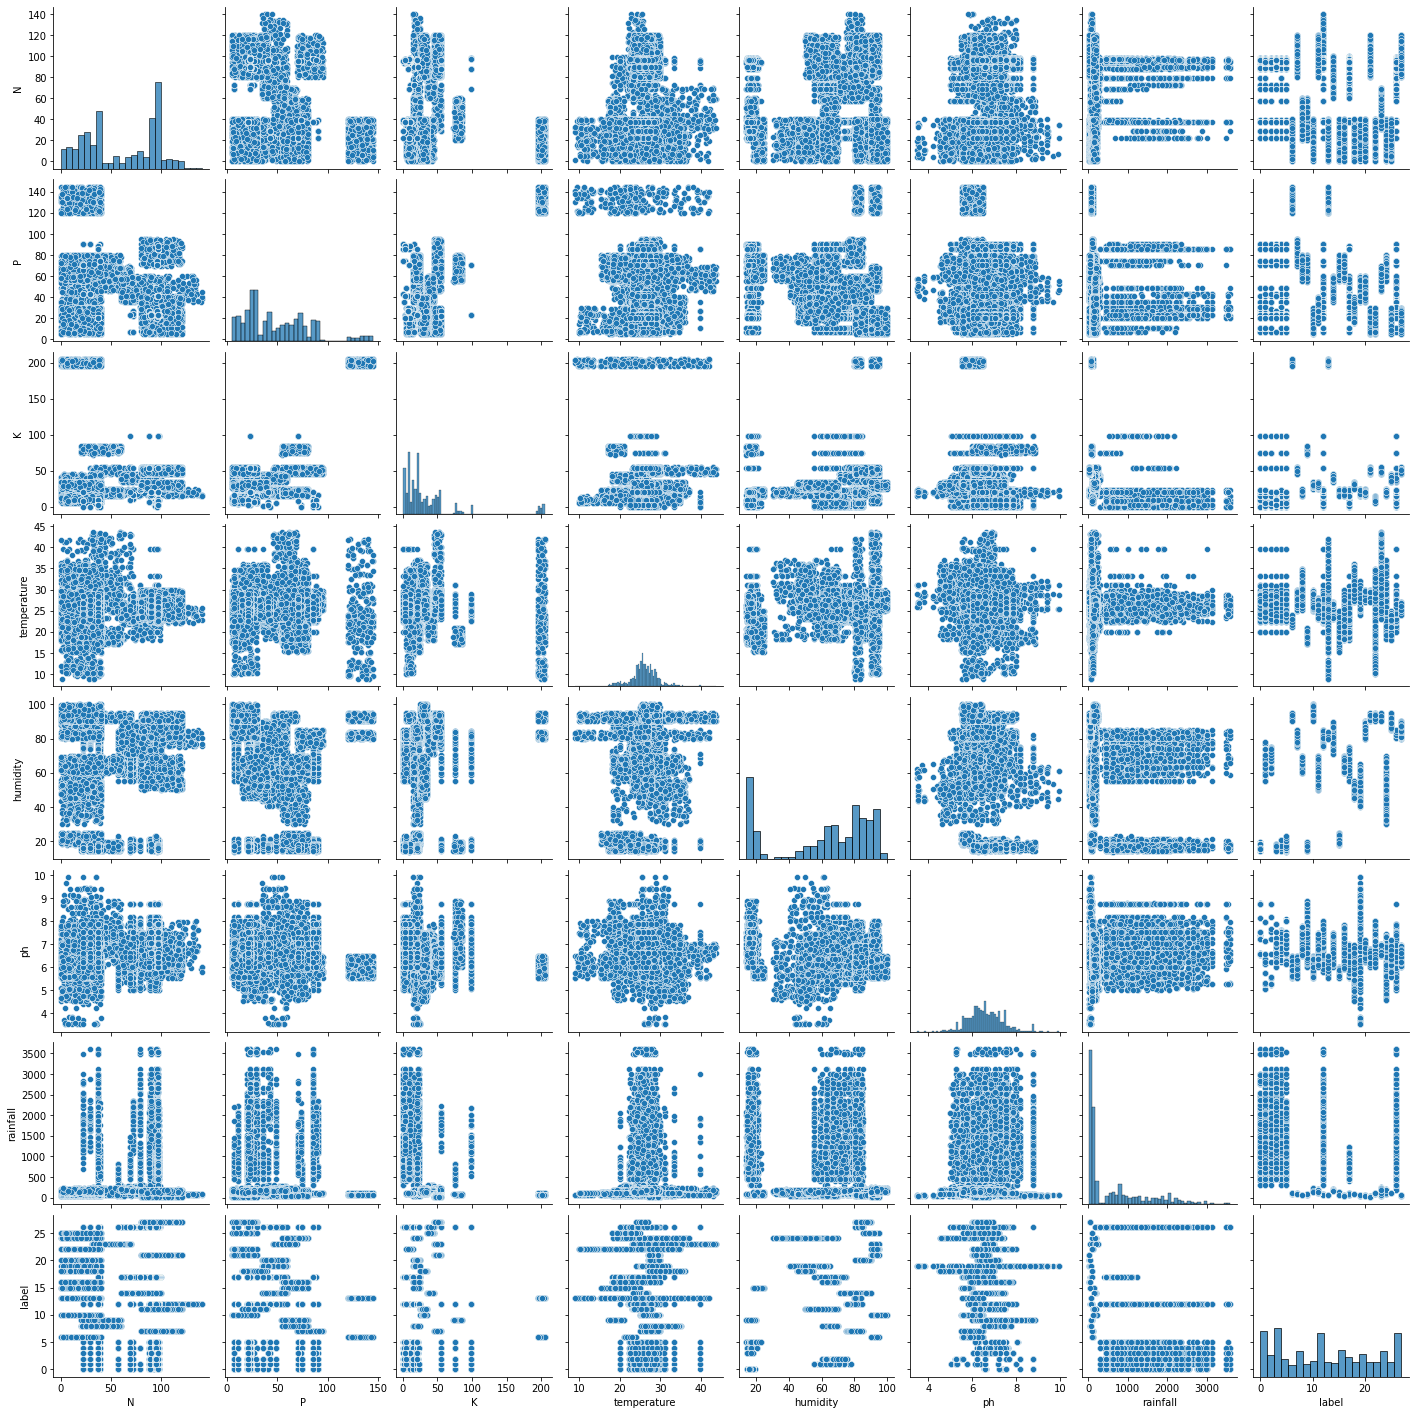

In [14]:
sns.pairplot(df)

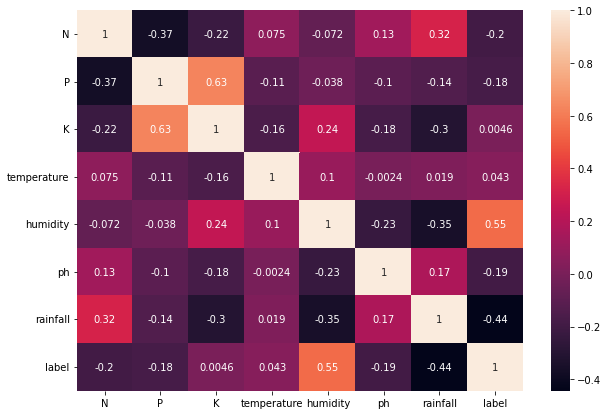

In [15]:
plt.figure(figsize=[10,7])
sns.heatmap(df.corr(),annot=True)

In [16]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [17]:
y=np_utils.to_categorical(y)
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=1)

In [20]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [21]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=1)
xsample,ysample=ros.fit_resample(xtrain,ytrain)

In [22]:
ann=Sequential()
ann.add(Dense(units=10,activation="relu"))
ann.add(Dense(units=5,activation="relu"))
ann.add(Dense(units=28,activation="softmax"))
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [23]:
ann.fit(xsample, ysample, epochs=500, validation_data=(xtest,ytest))

Epoch 1/500
357/357 [==============================] - 1s 2ms/step - loss: 3.0591 - accuracy: 0.1383 - val_loss: 2.6181 - val_accuracy: 0.2416
Epoch 2/500
357/357 [==============================] - 0s 1ms/step - loss: 2.1541 - accuracy: 0.3279 - val_loss: 1.7711 - val_accuracy: 0.3706
Epoch 3/500
357/357 [==============================] - 0s 1ms/step - loss: 1.5112 - accuracy: 0.4902 - val_loss: 1.3708 - val_accuracy: 0.5312
Epoch 4/500
357/357 [==============================] - 0s 1ms/step - loss: 1.1868 - accuracy: 0.5991 - val_loss: 1.1738 - val_accuracy: 0.5716
Epoch 5/500
357/357 [==============================] - 0s 1ms/step - loss: 1.0144 - accuracy: 0.6394 - val_loss: 1.0642 - val_accuracy: 0.5923
Epoch 6/500
357/357 [==============================] - 0s 1ms/step - loss: 0.9077 - accuracy: 0.6736 - val_loss: 0.9714 - val_accuracy: 0.6237
Epoch 7/500
357/357 [==============================] - 0s 1ms/step - loss: 0.8361 - accuracy: 0.6930 - val_loss: 0.9216 - val_accuracy: 0.6389

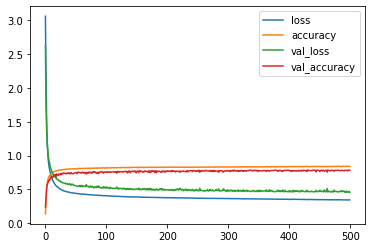

In [24]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

Low Bias and Low Varience

In [25]:
ypred=ann.predict(xtest)

In [26]:
length = len(ypred)

ylabel = np.argmax(ytest, axis=1) 
predlabel = np.argmax(ypred, axis=1)

acc = np.sum(ylabel==predlabel)/length * 100

print(f"Accuracy : {acc}")

Accuracy : 78.39975661697596


In [27]:
print(classification_report(ylabel,predlabel))

              precision    recall  f1-score   support

           0       0.49      0.55      0.52       163
           1       0.66      0.55      0.60       175
           2       0.63      0.46      0.53       139
           3       0.47      0.65      0.54       177
           4       0.32      0.31      0.31       153
           5       0.24      0.08      0.12       126
           6       1.00      1.00      1.00        94
           7       0.99      1.00      0.99        84
           8       0.90      0.90      0.90        83
           9       0.99      1.00      1.00       103
          10       0.98      0.98      0.98       113
          11       0.97      1.00      0.99       115
          12       0.69      0.67      0.68       207
          13       1.00      1.00      1.00        93
          14       0.89      0.97      0.93       105
          15       1.00      1.00      1.00       100
          16       0.89      0.90      0.90        90
          17       0.54    

In [32]:
ann.save("crop_recommendation.h5")

In [33]:
model=tf.keras.models.load_model("crop_recommendation.h5")

In [34]:
def mymodel():
  ann=Sequential()
  ann.add(Dense(units=10,activation="relu"))
  ann.add(Dense(units=5,activation="relu"))
  ann.add(Dense(units=28,activation="softmax"))
  ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
  return ann

In [35]:
estimators=KerasClassifier(build_fn=mymodel,epochs=200,batch_size=20,verbose=0)
kf=KFold(n_splits=12,shuffle=True)
cvs=cross_val_score(estimators,x,y,cv=kf)
print(f"Average Accuracy - {cvs.mean()}")
print(f"Std - {cvs.std()}")

Average Accuracy - 0.6683734953403473
Std - 0.09170899144041562


In [36]:
from google.colab import files
files.download("crop_recommendation.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>